In [1]:
import pandas as pd
import numpy as np
import pyfolio as pf

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\tomek\Anaconda3\envs\env_zipline\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
results = pd.read_pickle('strategy_1.pickle')
results.tail()

algo_volatility  algorithm_period_return     alpha  \
2018-10-25 20:00:00+00:00         0.186185                 5.726625  0.153603   
2018-10-26 20:00:00+00:00         0.186164                 5.706368  0.153189   
2018-10-29 20:00:00+00:00         0.186149                 5.756907  0.153583   
2018-10-30 20:00:00+00:00         0.186126                 5.752147  0.153634   
2018-10-31 20:00:00+00:00         0.186103                 5.740947  0.153591   

                           benchmark_period_return  benchmark_volatility  \
2018-10-25 20:00:00+00:00                 3.179020              0.180916   
2018-10-26 20:00:00+00:00                 3.105522              0.180950   
2018-10-29 20:00:00+00:00                 3.082776              0.180934   
2018-10-30 20:00:00+00:00                 3.143276              0.180947   
2018-10-31 20:00:00+00:00                 3.187530              0.180943   

                               beta  capital_used   ending_cash  \
2018-10-25 20:00:00+00:00 -0.146256    -146297.16  6.726625e+07   
2018-10-26 20:00:00+00:00 -0.146040    -202570.50  6.706368e+07   
2018-10-29 20:00:00+00:00 -0.146111     505386.00  6.756907e+07   
2018-10-30 20:00:00+00:00 -0.146087     -47591.50  6.752147e+07   
2018-10-31 20:00:00+00:00 -0.146101    -112000.50  6.740947e+07   

                           ending_exposure  ending_value  \
2018-10-25 20:00:00+00:00    -2.289984e+09           0.0   
2018-10-26 20:00:00+00:00    -2.295434e+09           0.0   
2018-10-29 20:00:00+00:00    -2.289018e+09           0.0   
2018-10-30 20:00:00+00:00    -2.303838e+09           0.0   
2018-10-31 20:00:00+00:00    -2.310788e+09           0.0   

                                   ...            short_exposure  short_value  \
2018-10-25 20:00:00+00:00          ...             -2.304718e+09          0.0   
2018-10-26 20:00:00+00:00          ...             -2.310246e+09          0.0   
2018-10-29 20:00:00+00:00          ...             -2.303711e+09          0.0   
2018-10-30 20:00:00+00:00          ...             -2.318345e+09          0.0   
2018-10-31 20:00:00+00:00          ...             -2.318554e+09          0.0   

                           shorts_count   sortino  starting_cash  \
2018-10-25 20:00:00+00:00            13  1.060990   6.741255e+07   
2018-10-26 20:00:00+00:00            14  1.059374   6.726625e+07   
2018-10-29 20:00:00+00:00            15  1.062906   6.706368e+07   
2018-10-30 20:00:00+00:00            17  1.062429   6.756907e+07   
2018-10-31 20:00:00+00:00            17  1.061484   6.752147e+07   

                           starting_exposure  starting_value  trading_days  \
2018-10-25 20:00:00+00:00      -2.556656e+09             0.0          3983   
2018-10-26 20:00:00+00:00      -2.289984e+09             0.0          3984   
2018-10-29 20:00:00+00:00      -2.295434e+09             0.0          3985   
2018-10-30 20:00:00+00:00      -2.289018e+09             0.0          3986   
2018-10-31 20:00:00+00:00      -2.303838e+09             0.0          3987   

                                                                transactions  \
2018-10-25 20:00:00+00:00  [{'dt': 2018-10-25 20:00:00+00:00, 'price': 11...   
2018-10-26 20:00:00+00:00  [{'dt': 2018-10-26 20:00:00+00:00, 'price': 1....   
2018-10-29 20:00:00+00:00  [{'dt': 2018-10-29 20:00:00+00:00, 'price': 13...   
2018-10-30 20:00:00+00:00  [{'dt': 2018-10-30 20:00:00+00:00, 'price': 83...   
2018-10-31 20:00:00+00:00  [{'dt': 2018-10-31 20:00:00+00:00, 'price': 10...   

                          treasury_period_return  
2018-10-25 20:00:00+00:00                    0.0  
2018-10-26 20:00:00+00:00                    0.0  
2018-10-29 20:00:00+00:00                    0.0  
2018-10-30 20:00:00+00:00                    0.0  
2018-10-31 20:00:00+00:00                    0.0  

[5 rows x 37 columns]

In [3]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)

In [4]:
transactions['txn_dollars'] = transactions['symbol'].apply(lambda x: x.multiplier) * transactions['txn_dollars']

In [5]:
transactions.head()

amount commission                        dt  \
2003-01-03 21:00:00+00:00      41       None 2003-01-03 21:00:00+00:00   
2003-01-03 21:00:00+00:00     -34       None 2003-01-03 21:00:00+00:00   
2003-01-03 21:00:00+00:00      56       None 2003-01-03 21:00:00+00:00   
2003-01-03 21:00:00+00:00      67       None 2003-01-03 21:00:00+00:00   
2003-01-03 21:00:00+00:00    -146       None 2003-01-03 21:00:00+00:00   

                                                   order_id    price  \
2003-01-03 21:00:00+00:00  60bad6f3de524d56bdbcd6e8eae18cd1  577.750   
2003-01-03 21:00:00+00:00  8969cb999e8b405fa2dd8ba1423e70c9  330.500   
2003-01-03 21:00:00+00:00  6cc99bc8f77245e0ab34d7367b06b25a    4.903   
2003-01-03 21:00:00+00:00  964cfecf65fb415eacef1f66155d814d   80.850   
2003-01-03 21:00:00+00:00  38adad1ba9434c52b59445c5fdc8c103    9.800   

                                            sid                symbol  \
2003-01-03 21:00:00+00:00   Future(6159 [SH03])   Future(6159 [SH03])   
2003-01-03 21:00:00+00:00   Future(6160 [WH03])   Future(6160 [WH03])   
2003-01-03 21:00:00+00:00  Future(6191 [SIH03])  Future(6191 [SIH03])   
2003-01-03 21:00:00+00:00  Future(6156 [LCG03])  Future(6156 [LCG03])   
2003-01-03 21:00:00+00:00  Future(6143 [DAF03])  Future(6143 [DAF03])   

                           txn_dollars  
2003-01-03 21:00:00+00:00   -1184387.5  
2003-01-03 21:00:00+00:00     561850.0  
2003-01-03 21:00:00+00:00   -1372840.0  
2003-01-03 21:00:00+00:00   -2166780.0  
2003-01-03 21:00:00+00:00    2861600.0

In [6]:
positions.head()

sid                        Future(6134 [CLG03])  Future(6138 [NGG03])  \
index                                                                   
2003-01-03 00:00:00+00:00                  0.00                   0.0   
2003-01-06 00:00:00+00:00                834.60                   0.0   
2003-01-07 00:00:00+00:00                808.08                   0.0   
2003-01-08 00:00:00+00:00                794.56                   0.0   
2003-01-09 00:00:00+00:00                831.74                   0.0   

sid                        Future(6143 [DAF03])  Future(6144 [HOG03])  \
index                                                                   
2003-01-03 00:00:00+00:00              -1430.80                 0.000   
2003-01-06 00:00:00+00:00              -1430.80                20.401   
2003-01-07 00:00:00+00:00              -1438.10                19.504   
2003-01-08 00:00:00+00:00              -1433.72                19.136   
2003-01-09 00:00:00+00:00              -1426.42                 0.000   

sid                        Future(6147 [CLH03])  Future(6148 [GCG03])  \
index                                                                   
2003-01-03 00:00:00+00:00                   0.0                   0.0   
2003-01-06 00:00:00+00:00                   0.0               19013.4   
2003-01-07 00:00:00+00:00                   0.0               18775.8   
2003-01-08 00:00:00+00:00                   0.0               19132.2   
2003-01-09 00:00:00+00:00                   0.0               19099.8   

sid                        Future(6150 [NGH03])  Future(6152 [DAG03])  \
index                                                                   
2003-01-03 00:00:00+00:00                   0.0                   0.0   
2003-01-06 00:00:00+00:00                   0.0                   0.0   
2003-01-07 00:00:00+00:00                   0.0                   0.0   
2003-01-08 00:00:00+00:00                   0.0                   0.0   
2003-01-09 00:00:00+00:00                   0.0                   0.0   

sid                        Future(6155 [HOH03])  Future(6156 [LCG03])  \
index                                                                   
2003-01-03 00:00:00+00:00                   0.0               5416.95   
2003-01-06 00:00:00+00:00                   0.0               5411.59   
2003-01-07 00:00:00+00:00                   0.0               5455.14   
2003-01-08 00:00:00+00:00                   0.0               5433.70   
2003-01-09 00:00:00+00:00                   0.0               5478.59   

sid                           ...      Future(27801 [ESZ18])  \
index                         ...                              
2003-01-03 00:00:00+00:00     ...                        0.0   
2003-01-06 00:00:00+00:00     ...                        0.0   
2003-01-07 00:00:00+00:00     ...                        0.0   
2003-01-08 00:00:00+00:00     ...                        0.0   
2003-01-09 00:00:00+00:00     ...                        0.0   

sid                        Future(27805 [MDZ18])  Future(27806 [NQZ18])  \
index                                                                     
2003-01-03 00:00:00+00:00                    0.0                    0.0   
2003-01-06 00:00:00+00:00                    0.0                    0.0   
2003-01-07 00:00:00+00:00                    0.0                    0.0   
2003-01-08 00:00:00+00:00                    0.0                    0.0   
2003-01-09 00:00:00+00:00                    0.0                    0.0   

sid                        Future(27819 [GCZ18])  Future(27822 [PAZ18])  \
index                                                                     
2003-01-03 00:00:00+00:00                    0.0                    0.0   
2003-01-06 00:00:00+00:00                    0.0                    0.0   
2003-01-07 00:00:00+00:00                    0.0                    0.0   
2003-01-08 00:00:00+00:00                    0.0                    0.0   
2003-01-09 00:0

In [7]:
#results.to_csv('results.csv')
#returns.to_csv('returns.csv')
#transactions.to_csv('transactions.csv')
#positions.to_csv('positions.csv')

In [8]:
# generate sector dictionary for every symbol
pos = list(positions.columns)
pos.remove('cash')
sectors = pd.read_csv('../bundles/meta.csv', usecols=['root_symbol', 'sector', 'sub_sector'], index_col=['root_symbol'])
sectors['sector'] = sectors['sector'].str.cat(sectors['sub_sector'], sep='/')
del sectors['sub_sector']
sectors.index = sectors.index.map(lambda x: x if len(x) > 1 else '_' + x)
sectors = sectors.T.to_dict(orient='records')[0]
sector_map = {p: sectors[p.root_symbol] for p in pos}

In [9]:
out_of_sample=results.index[-25]
benchmark = (results['benchmark_period_return'] + 1).pct_change()

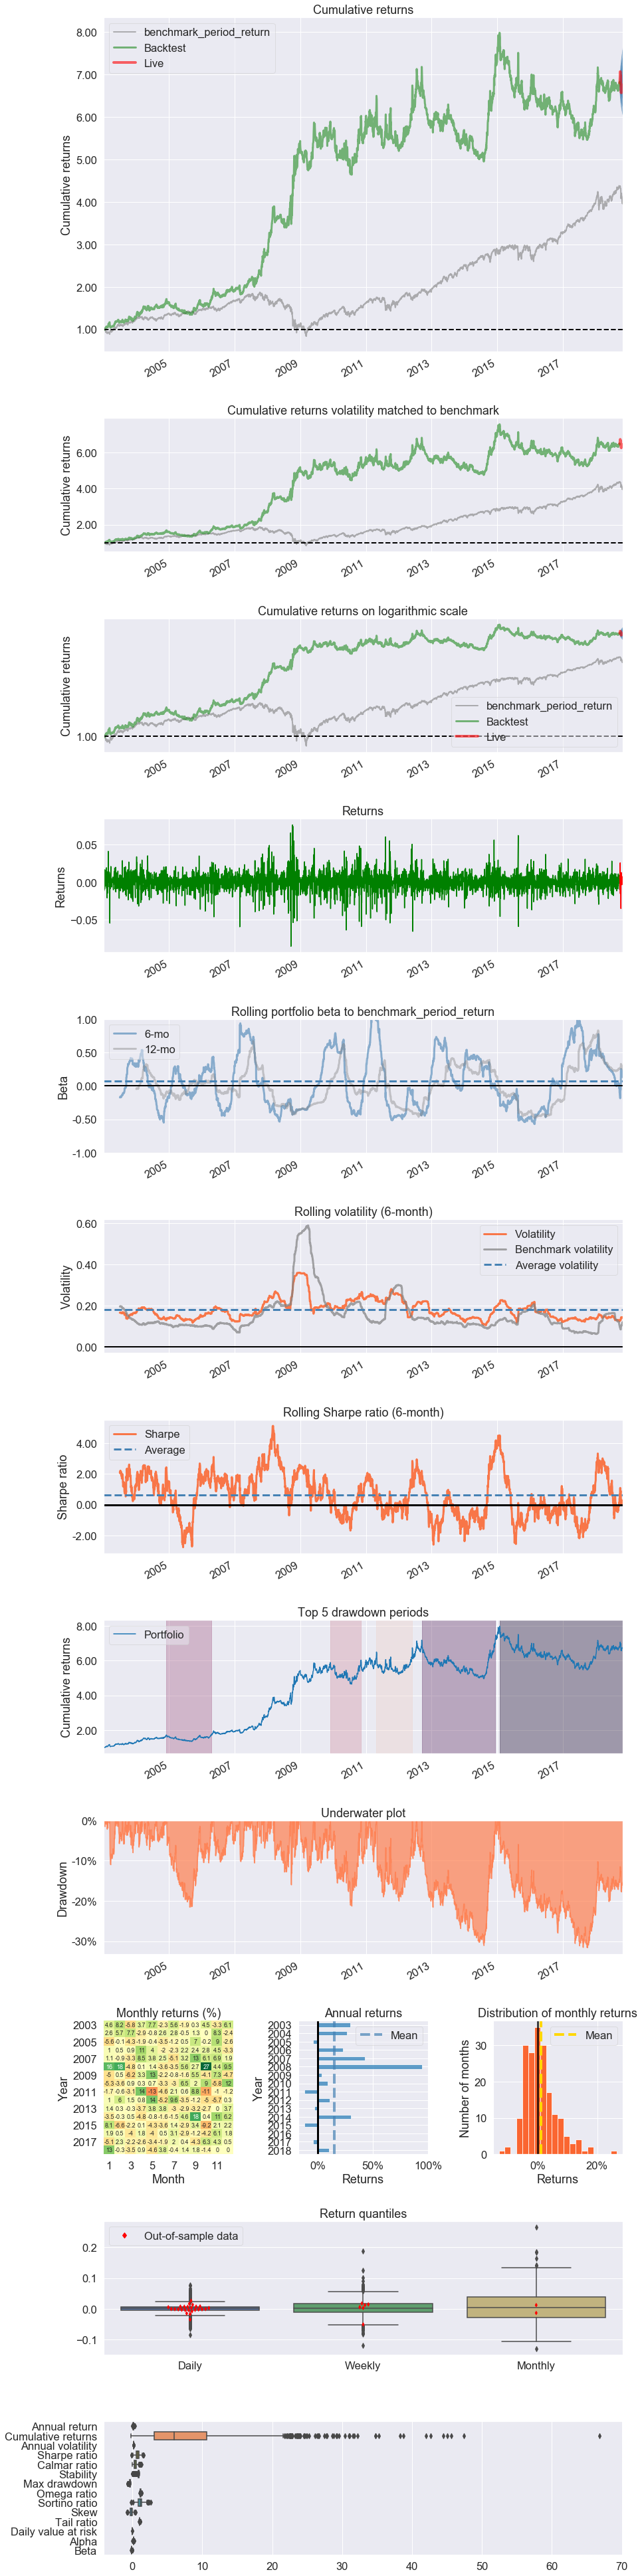

C:\Users\tomek\Anaconda3\envs\env_zipline\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


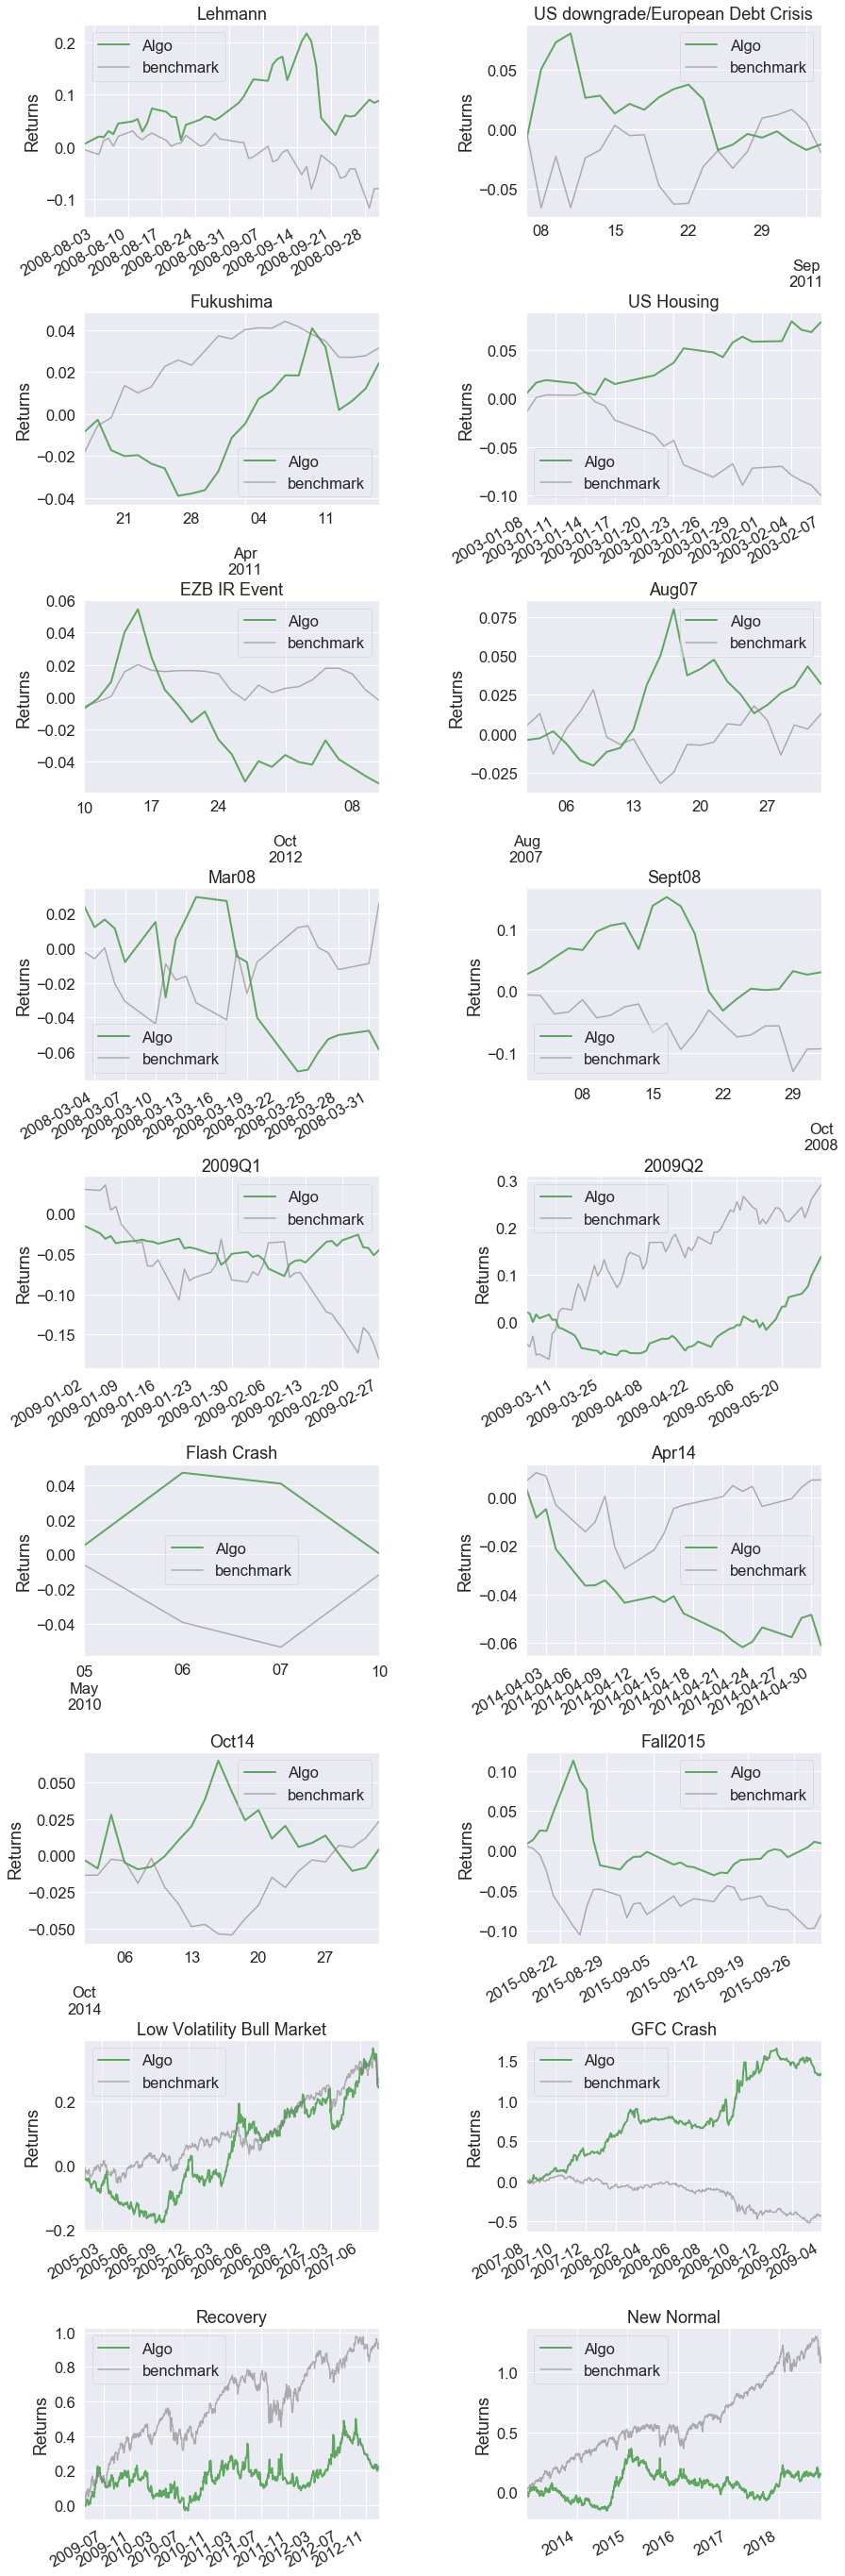

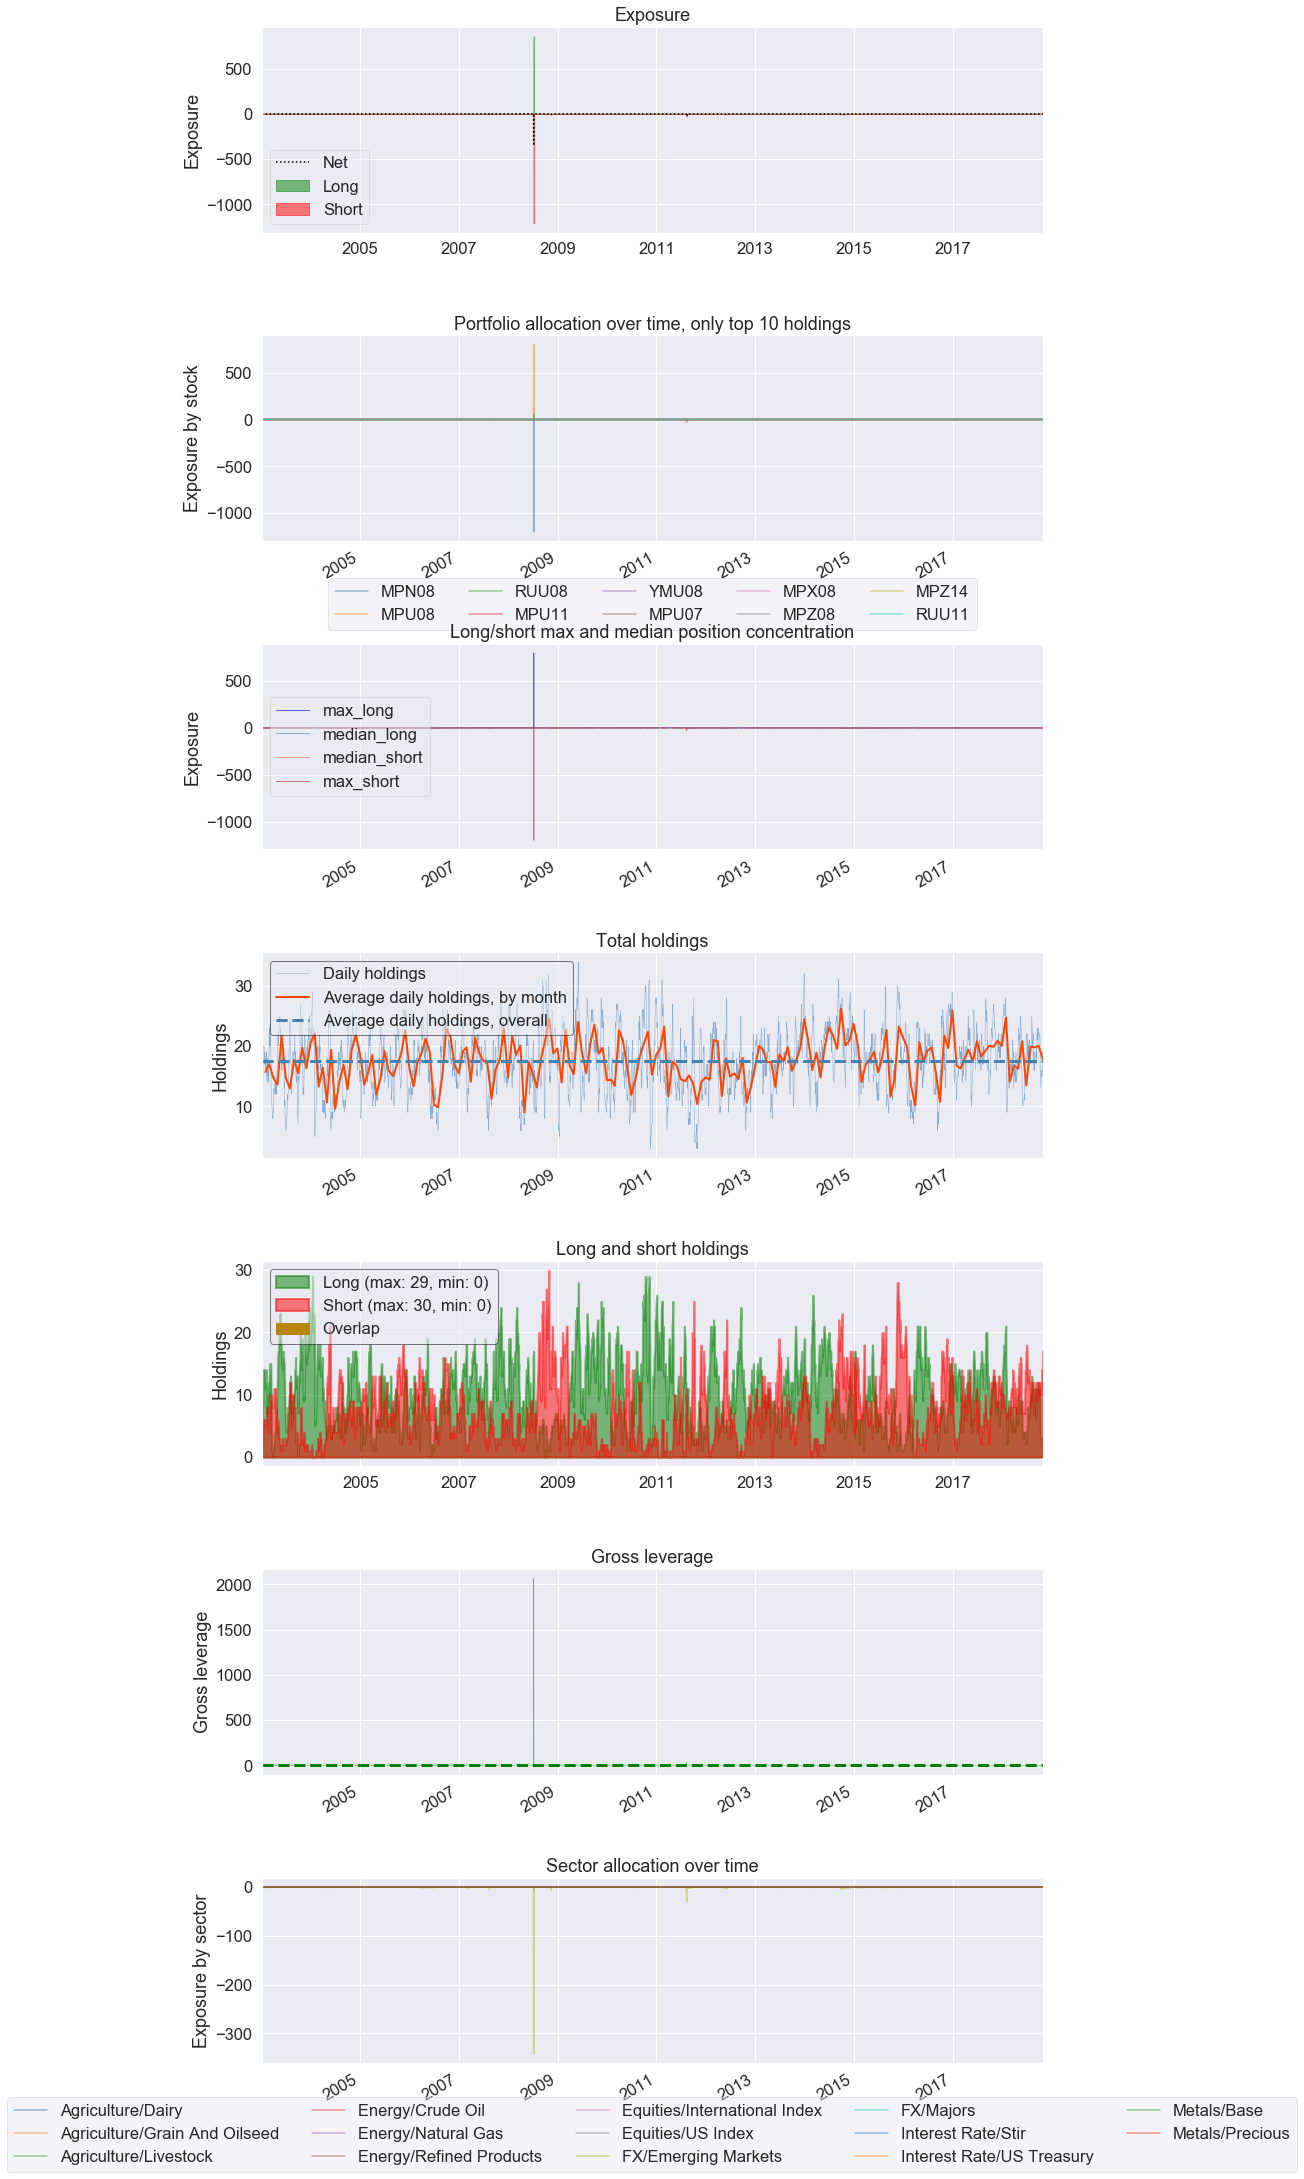

C:\Users\tomek\Anaconda3\envs\env_zipline\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


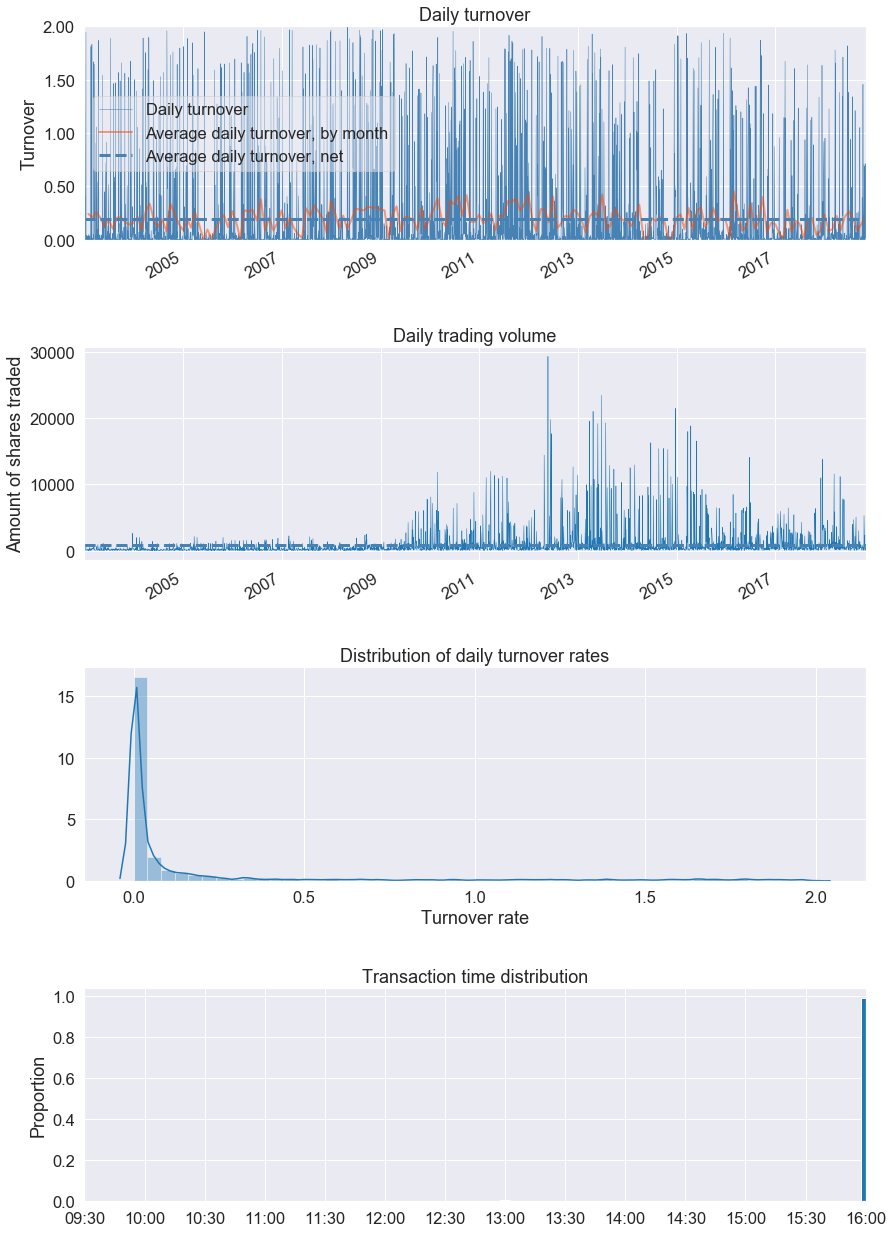

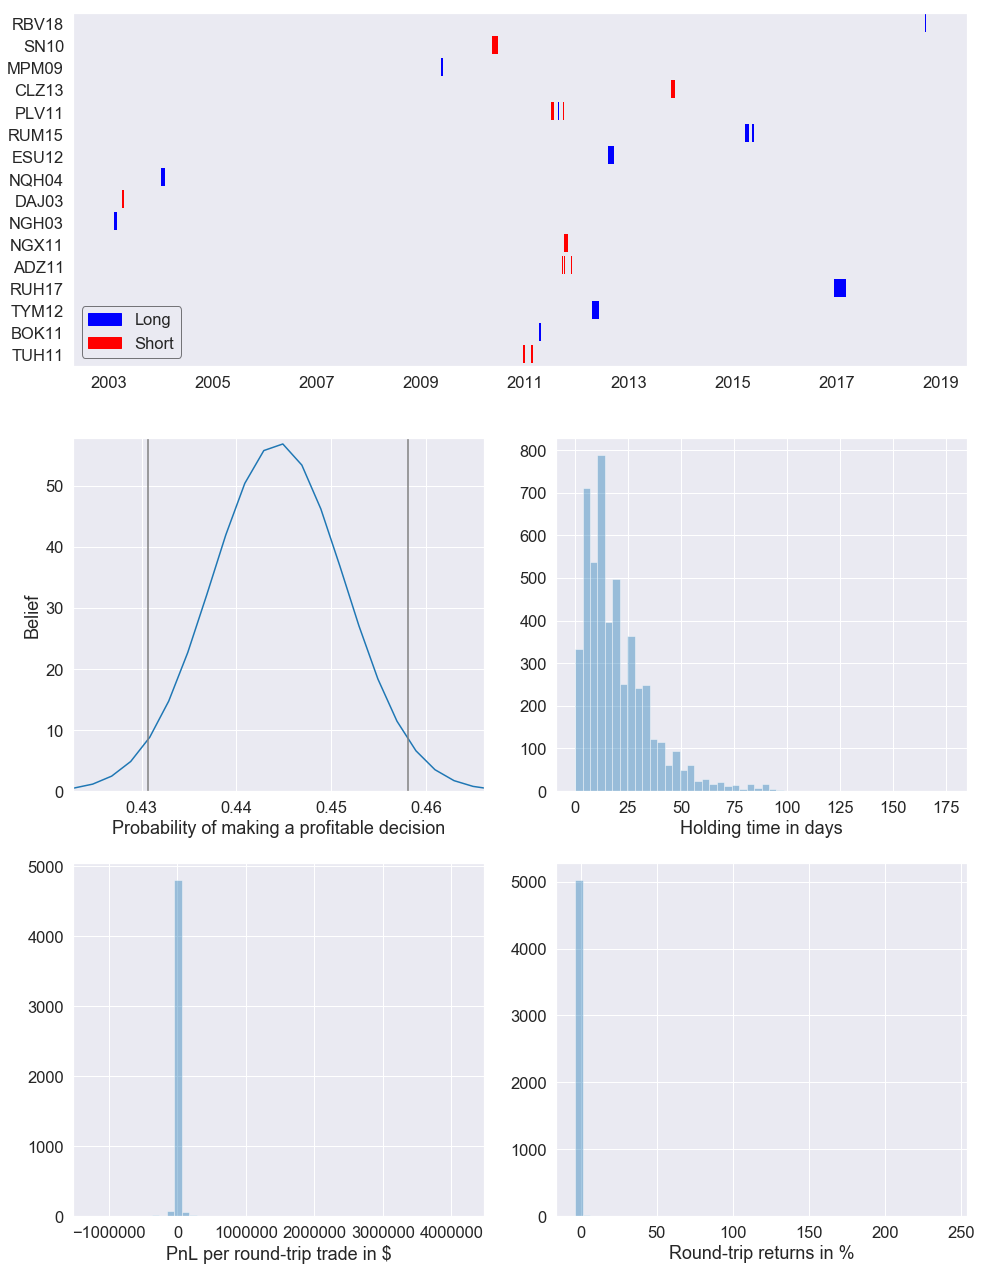

In [10]:
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions,
                          live_start_date=out_of_sample, round_trips=True, benchmark_rets=benchmark,
                         sector_mappings=sector_map)

Following cells allow visualization of trades for given root_symbol.

In [11]:
import os
from zipline.data import bundles
from zipline.data.data_portal import DataPortal
from zipline.utils.calendars import get_calendar
from zipline.assets._assets import Future
from zipline.utils.run_algo import load_extensions

# Load extensions.py; this allows you access to custom bundles
load_extensions(
    default=True,
    extensions=[],
    strict=True,
    environ=os.environ,
)

# Set-Up Pricing Data Access
trading_calendar = get_calendar('NYSE')
bundle = 'futures'
bundle_data = bundles.load(bundle)

data = DataPortal(
    bundle_data.asset_finder,
    trading_calendar=trading_calendar,
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_minute_reader=None,
    equity_daily_reader=bundle_data.equity_daily_bar_reader,
    future_daily_reader=bundle_data.equity_daily_bar_reader,
    adjustment_reader=bundle_data.adjustment_reader,
)
future = bundle_data.asset_finder.lookup_future_symbol
continuous_future = bundle_data.asset_finder.create_continuous_future
history = data.get_history_window

C:\Users\tomek\zipline\bundles\extension.py:13: UserWarning: Overwriting bundle with name 'futures'
  end_session=end_session,


In [29]:
root = 'CL'

In [30]:
def his(root, field='price'):
    return history(
                   assets=[continuous_future(root,
                                     offset=0,
                                     adjustment=None,
                                     roll_style='volume')],
                    end_dt=results.index[-1],
                    bar_count=len(results),
                    frequency='1d',
                    field=field,
                    data_frequency='daily'
                    )

In [31]:
h = his(root)
h.columns=[root]

In [32]:
transactions['root_symbol'] = transactions['symbol'].apply(lambda x: x.root_symbol)
selected = transactions[transactions['root_symbol'] == root]
selected.index = selected.index.normalize()
buys = selected[selected['amount'] > 0]
sells = selected[selected['amount'] < 0]

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

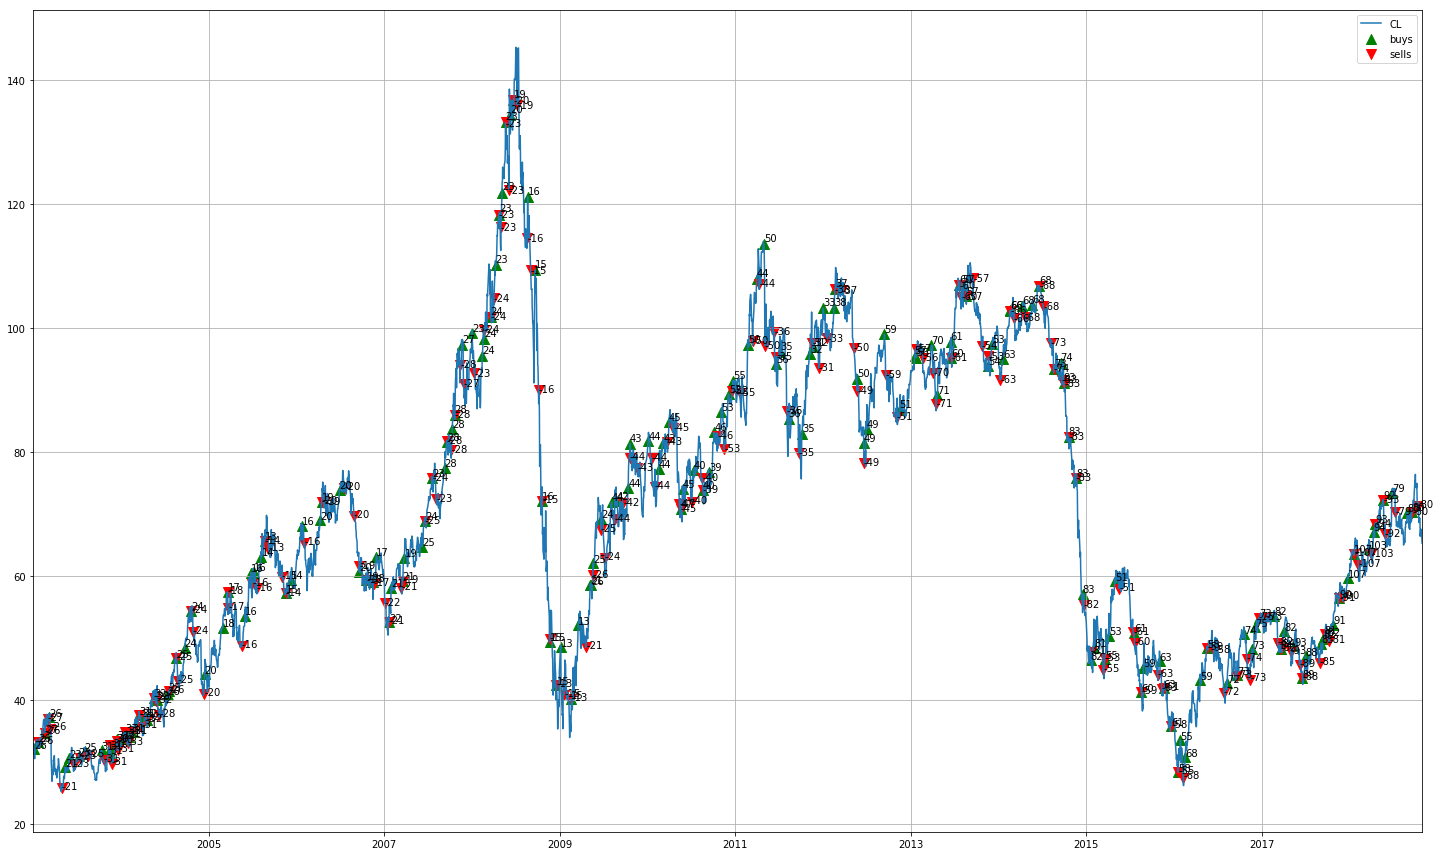

In [34]:
plt.figure(figsize=(20,12))
plt.plot(h, label=root)
plt.scatter(buys.index, h.loc[buys.index], label='buys', color='green', s=100, marker="^")
plt.scatter(sells.index, h.loc[sells.index], label='sells', color='red', s=100, marker="v")
for i, txt in enumerate(buys['amount'].values):
    plt.annotate(txt, (buys.index[i], h.loc[buys.index[i]][root]*1.004))
for i, txt in enumerate(sells['amount'].values):
    plt.annotate(txt, (sells.index[i], h.loc[sells.index[i]][root]*.996))
plt.xlim(h.index.min(), h.index.max())
plt.legend(loc='best')
plt.grid()
#plt.rcParams['font.size'] = 15
plt.tight_layout()
plt.show();

In [35]:
chart = h.copy()
chart = chart.join(selected.amount)
chart.amount = chart.amount.fillna(0)
chart.ix[0, 'amount']=0
chart['cumulative'] = chart['amount'].cumsum(skipna=False)

In [36]:
chart['long'] = chart['cumulative'] > 0
chart['short'] = chart['cumulative'] < 0
chart['flat'] = chart['cumulative'] == 0
chart['long'] = chart['long'] * chart[root]
chart['short'] = chart['short'] * chart[root]
chart['flat'] = chart['flat'] * chart[root]
chart = chart[['long', 'short', 'flat']].applymap(lambda x: x if x != 0 else np.nan)

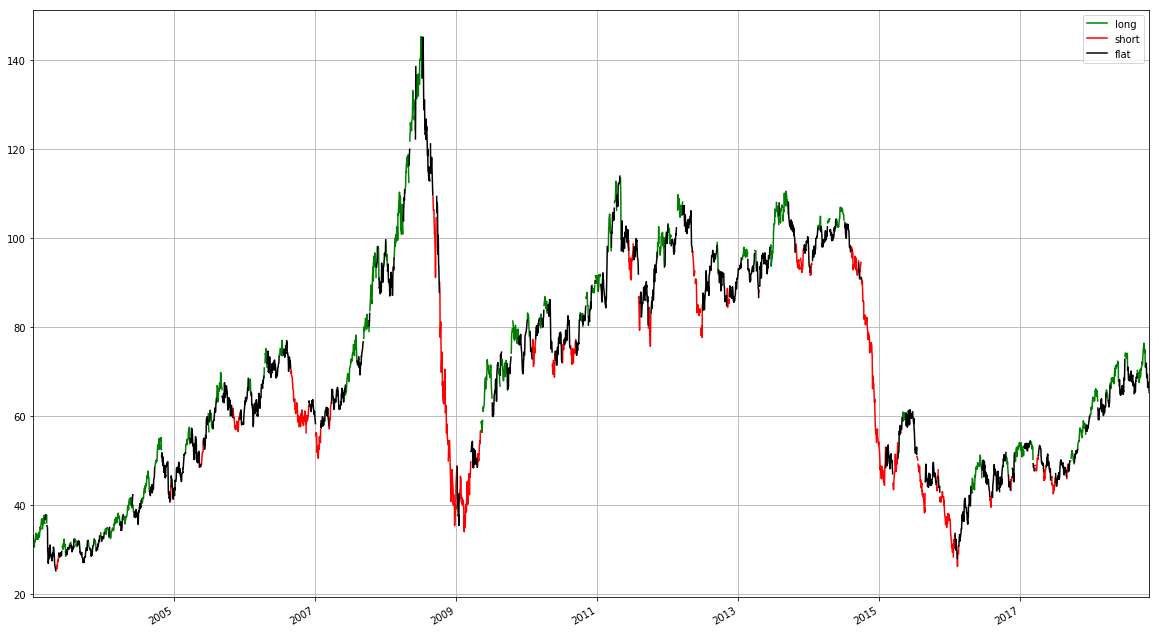

In [37]:
chart['long'].plot(figsize=(20,12), legend=True, color='green')
chart['short'].plot(legend=True, color='red')
chart['flat'].plot(legend=True, color='black')
plt.grid();

In [38]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go

In [39]:
plotly.offline.init_notebook_mode(connected=True)

In [40]:
full_h = his(root)
full_h.columns = ['close']
for field in ['open', 'high', 'low',]:
    full_h[field] = his(root, field)

In [41]:
exclude_rolls = False
if exclude_rolls:
    intersection = buys.index.intersection(sells.index)
    buys = buys.drop(intersection)
    sells = sells.drop(intersection)

In [42]:
trace1 = go.Candlestick(x=full_h.index, 
                        open=full_h.open,
                        high=full_h.high,
                        low=full_h.low,
                        close=full_h.close, 
                        name=root, 
                        hoverinfo='none')

In [43]:
params = {
    'mode': 'markers',
    'hoverinfo': 'text',
}
trace2 = go.Scatter(
    x=buys.index,
    y=buys['price'],
    name='Buys',
    text=list(buys['amount']),
    textposition='middle left',
    marker=dict(size=8,
                color='rgba(0, 0, 128, .9)'),
    **params,
)
trace3 = go.Scatter(
    x=sells.index,
    y=sells['price'],
    name='Sells',
    text=list(sells['amount']),
    textposition='middle right',
    marker=dict(size=8,
                color='rgba(255, 255, 0, .9)'),
    **params
)

In [44]:
layout = go.Layout(
    xaxis = dict(
        rangeslider = dict(
            visible = False
        )
    )
)
data = [trace1, trace2, trace3]
fig = go.Figure(data=data,layout=layout)

In [45]:
py.iplot(fig, filename='candlestick_chart')